In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the data
df = pd.read_csv('/Users/Bhaumik/Desktop/Klarna Case Study/Fraud Project/STO 21 Klarna Overnight Case Study Data.csv', delimiter = ';')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20554 entries, 0 to 20553
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   transaction_id         10277 non-null  float64
 1   time_of_purchase       10277 non-null  object 
 2   purchase_amount (SEK)  10277 non-null  float64
 3   customer_id            10277 non-null  float64
 4   fname                  10277 non-null  object 
 5   lname                  10277 non-null  object 
 6   age                    10277 non-null  float64
 7   addr_city              10277 non-null  object 
 8   email                  10277 non-null  object 
 9   has_paid_before        10277 non-null  object 
 10  annual_salary          10277 non-null  object 
 11  type_of_goods          10277 non-null  object 
 12  delivery_city          10277 non-null  object 
 13  ip_country             9673 non-null   object 
 14  is_fraud               10277 non-null  object 
dtypes:

In [4]:
#Replacing "t" , "f" value to 0 and 1

df["has_paid_before"].replace({"t": 1, "f": 0}, inplace=True)
df["is_fraud"].replace({"t": 1, "f": 0}, inplace=True)
df["annual_salary"].replace({'-' : np.nan}, inplace=True)

In [5]:
# Data Cleaning

data = df.dropna(how = 'all')

convert_dict = {"transaction_id": 'int',"customer_id": 'int', "age": 'int',"has_paid_before" : 'int', "annual_salary" : 'float', "type_of_goods" : 'category',"is_fraud" : 'int' }
  
data = data.astype(convert_dict)

data['time_of_purchase'] = pd.to_datetime(data['time_of_purchase'],format= '%H:%M:%S' ).dt.time
hour = [r.hour for r in data.time_of_purchase]
time_of_day = pd.cut(hour, bins = pd.interval_range(start = 0, end = 24, periods = 6, closed = 'left'))

data.insert(2,'hour',hour)
data['hour'].astype(int)
data.insert(3,'time_of_day',time_of_day)

full_name = data['fname'].str.cat(data['lname'],sep=" ")
data.insert(8,'full name',full_name)

data.drop('fname', axis=1, inplace=True)
data.drop('lname', axis=1, inplace=True)

age_group = pd.cut(data.age,bins=[0,12,19,30,45,65,200],labels=['Child','Teenager','Adult','Middle-Aged','Old Adult','Elderly'])
data.insert(8,'age_group', age_group)

salary_range = pd.cut(data.annual_salary,bins = pd.interval_range(start=0, end= 500000, periods=10, closed = 'right')).astype('object')
data.insert(13,'salary_range', salary_range) 
data["salary_range"].fillna('Not Available', inplace = True)

domain = data['email'].str.split('@').str[1]
data.insert(11,'domain', domain)

data["ip_country"].fillna('Not Available', inplace = True)

data.head()

,transaction_id,time_of_purchase,hour,time_of_day,purchase_amount (SEK),customer_id,full name,age,age_group,addr_city,email,domain,has_paid_before,annual_salary,salary_range,type_of_goods,delivery_city,ip_country,is_fraud
0,2001563,16:52:11,16,"[16, 20)",15249.0,3941,Agneta Jansson,28,Adult,Stockholm,og20neta.jansslite@hotmail.con,hotmail.con,1,NaN,Not Available,Clothing,Fieldberg,SE,0
1,1997663,14:20:45,14,"[12, 16)",9334.0,122158,Agneta Gustafsson,73,Elderly,Malmo,og20neta_gustafsslite@gmail.con,gmail.con,0,340000.0,"(300000, 350000]",Dating,Magenta,SE,0
2,2013263,12:26:00,12,"[12, 16)",8744.0,25977,Agneta Olofsson,60,Old Adult,Stockholm,og20neta.olofsslite@hotmail.con,hotmail.con,1,304000.0,"(300000, 350000]",Clothing,Fieldberg,SE,0
3,2009363,15:13:01,15,"[12, 16)",6779.0,31238,Agneta Petersson,66,Elderly,Stockholm,og20neta.petersslite@hotmail.con,hotmail.con,1,76000.0,"(50000, 100000]",Electronics,Fieldberg,SE,0
4,1988563,16:08:04,16,"[16, 20)",4963.0,37499,Agneta Karlsson,36,Middle-Aged,Lund,og20n.kalite@yahoo.sn,yahoo.sn,0,228000.0,"(200000, 250000]",Tickets,Lund,FI,0


In [6]:
final_data = data

In [7]:
#Problem 1 - Basic Analysis

# Fraud Ratio in Clothing category

clothing_total = len(final_data.loc[final_data['type_of_goods'] == 'Clothing'])

clothing_fraud = len(final_data[(final_data["type_of_goods"] == 'Clothing') & (final_data["is_fraud"] == 1)])

clothing_fraud_percent = (clothing_fraud / clothing_total) * 100

print('Total no. of transactions for clothing category : {}'.format(clothing_total))
print('Total no. of fraud transactions within clothing category : {}'.format(clothing_fraud))
print('Percentage of Fraud Transactions in clothing category : {:.2f}%'.format(clothing_fraud_percent))

Total no. of transactions for clothing category : 5614
Total no. of fraud transactions within clothing category : 184
Percentage of Fraud Transactions in clothing category : 3.28%


In [8]:
# Fraud Ratio for purchase amount greater than 1000 SEK


purchase_amount_total = len(final_data.loc[final_data['purchase_amount (SEK)'] > 1000])

purchase_amount_fraud = len(final_data[(final_data['purchase_amount (SEK)'] > 1000) & (final_data["is_fraud"] == 1)])

purchase_amount_fraud_percent = (purchase_amount_fraud / purchase_amount_total) * 100

print('Total no. of transactions for purchase amount greater than 1000 SEK : {}'.format(purchase_amount_total))
print('Total no. of fraud transactions within purchase amount grater than 1000 SEK : {}'.format(purchase_amount_fraud))
print('Percentage of Fraud Transactions for purchase amount greater than 1000 SEK : {:.2f}%'.format(purchase_amount_fraud_percent))

Total no. of transactions for purchase amount greater than 1000 SEK : 4850
Total no. of fraud transactions within purchase amount grater than 1000 SEK : 409
Percentage of Fraud Transactions for purchase amount greater than 1000 SEK : 8.43%


In [9]:
# Fraud Ratio for transactions coming from UK


UK_total = len(final_data.loc[final_data['ip_country'] == 'UK'])

UK_fraud = len(final_data[(final_data["ip_country"] == 'UK') & (final_data["is_fraud"] == 1)])

UK_fraud_percent = (UK_fraud / UK_total) * 100

print('Total no. of transactions in UK : {}'.format(UK_total))
print('Total no. of fraud transactions within UK : {}'.format(UK_fraud))
print('Percentage of Fraud Transactions in UK : {:.2f}%'.format(UK_fraud_percent))

Total no. of transactions in UK : 120
Total no. of fraud transactions within UK : 49
Percentage of Fraud Transactions in UK : 40.83%


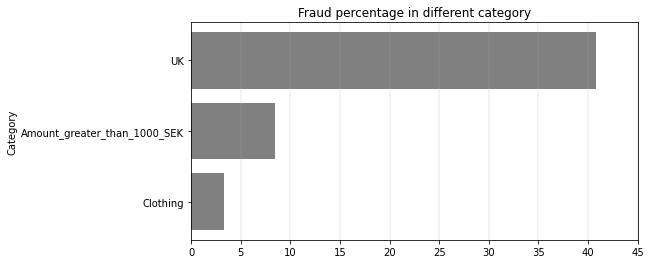

In [10]:
# Data Visualization through bar chart

Clothing = clothing_fraud_percent
Amount_greater_than_1000_SEK = purchase_amount_fraud_percent
UK = UK_fraud_percent

key_data = {x: eval(x) for x in ["Clothing","Amount_greater_than_1000_SEK", "UK"]}

fig = plt.figure(figsize = (8, 4))

plt.barh(list(key_data.keys()), list(key_data.values()), color = 'grey')
 
plt.ylabel("Percentage of Fraud")
plt.ylabel("Category")
plt.title("Fraud percentage in different category")
plt.grid(axis = 'x',linestyle = '--', linewidth = 0.4)
plt.xlim((0,45))
plt.show()

In [11]:
# Problem 2  - Trend Analysis

# grouping by different sub-categories in terms of purchase amount

type_of_goods = final_data[(final_data["is_fraud"] == 1)].groupby('type_of_goods', dropna = False)["purchase_amount (SEK)"].sum().sort_values()

addr_city = final_data[(final_data["is_fraud"] == 1)].groupby('addr_city', dropna = False)["purchase_amount (SEK)"].sum().sort_values()

delivery_city = final_data[(final_data["is_fraud"] == 1)].groupby('delivery_city', dropna = False)["purchase_amount (SEK)"].sum().sort_values()

ip_country = final_data[(final_data["is_fraud"] == 1)].groupby('ip_country', dropna = False)["purchase_amount (SEK)"].sum().sort_values()

age_group = final_data[(final_data["is_fraud"] == 1)].groupby('age_group', dropna = False)["purchase_amount (SEK)"].sum().sort_values()

domain = final_data[(final_data["is_fraud"] == 1)].groupby('domain', dropna = False)["purchase_amount (SEK)"].sum().sort_values()

salary_range = final_data[(final_data["is_fraud"] == 1)].groupby('salary_range', dropna = False)["purchase_amount (SEK)"].sum().sort_values()

time_of_day = final_data[(final_data["is_fraud"] == 1)].groupby('time_of_day', dropna = False)["purchase_amount (SEK)"].sum().sort_values()



In [12]:
# Combine all the above dataframes into single dataframe

category = [type_of_goods, addr_city, delivery_city, ip_country, age_group, domain, salary_range, time_of_day]

fraud_Ind = pd.concat(category, keys=["type_of_goods", "addr_city", "delivery_city", "ip_country", "age_group", "domain", "salary_range", "time_of_day"])


In [13]:
# filter highest categories/subcategories with highest purchase amount 

fraud_Ind.nlargest(6)

ip_country     Not Available    1751208.0
type_of_goods  Tickets          1467574.0
addr_city      Stockholm        1082213.0
time_of_day    [16, 20)         1000797.0
               [20, 24)          961241.0
delivery_city  Fieldberg         883859.0
Name: purchase_amount (SEK), dtype: float64

In [14]:
# Problem 3 - Fraud Rule Creation

# a. hit rate and catch rate for ip_country - 'Not Available'
# Rule logic: ip_country is not available

total_transactions = len(final_data)
fraud_transactions = len(final_data[final_data.is_fraud == 1])

for_review = len(final_data[final_data.ip_country == "Not Available"])
actual_fraud = len(final_data[(final_data["ip_country"] == "Not Available") & (final_data["is_fraud"] == 1)])


hit_rate = (actual_fraud / for_review)*100
catch_rate = (actual_fraud / fraud_transactions)*100


print('Total no. of transactions : {}'.format(total_transactions))
print('Total no. of fraud transactions : {}'.format(fraud_transactions))
print('Total no. of transactions hit by ip_country rule : {}'.format(for_review))
print('Total no. of actual fraud transactions from reviewed transactions : {}'.format(actual_fraud))
print('Hit Rate for the ip_country rule : {:.2f}%'.format(hit_rate))
print('Catch Rate for the ip_country rule : {:.2f}%'.format(catch_rate))

Total no. of transactions : 10277
Total no. of fraud transactions : 487
Total no. of transactions hit by ip_country rule : 604
Total no. of actual fraud transactions from reviewed transactions : 230
Hit Rate for the ip_country rule : 38.08%
Catch Rate for the ip_country rule : 47.23%


In [15]:
# a. hit rate and catch rate for type_of_goods - 'Tickets'
# Rule logic: type_of_goods is equal to 'Tickets'

total_transactions = len(final_data)
fraud_transactions = len(final_data[final_data.is_fraud == 1])

for_review = len(final_data[final_data.type_of_goods == "Tickets"])
actual_fraud = len(final_data[(final_data["type_of_goods"] == "Tickets") & (final_data["is_fraud"] == 1)])


hit_rate = (actual_fraud / for_review)*100
catch_rate = (actual_fraud / fraud_transactions)*100


print('Total no. of transactions : {}'.format(total_transactions))
print('Total no. of fraud transactions : {}'.format(fraud_transactions))
print('Total no. of transactions hit by type_of_goods rule : {}'.format(for_review))
print('Total no. of actual fraud transactions from reviewed transactions : {}'.format(actual_fraud))
print('Hit Rate for the type_of_goods rule : {:.2f}%'.format(hit_rate))
print('Catch Rate for the type_of_goods rule : {:.2f}%'.format(catch_rate))

Total no. of transactions : 10277
Total no. of fraud transactions : 487
Total no. of transactions hit by type_of_goods rule : 911
Total no. of actual fraud transactions from reviewed transactions : 196
Hit Rate for the type_of_goods rule : 21.51%
Catch Rate for the type_of_goods rule : 40.25%


In [16]:
# a. hit rate and catch rate for addr_city - 'Stockholm'
# Rule logic: addr_city id equal to 'Stockholm'

total_transactions = len(final_data)
fraud_transactions = len(final_data[final_data.is_fraud == 1])

for_review = len(final_data[final_data.addr_city == "Stockholm"])
actual_fraud = len(final_data[(final_data["addr_city"] == "Stockholm") & (final_data["is_fraud"] == 1)])



hit_rate = (actual_fraud / for_review)*100
catch_rate = (actual_fraud / fraud_transactions)*100


print('Total no. of transactions : {}'.format(total_transactions))
print('Total no. of fraud transactions : {}'.format(fraud_transactions))
print('Total no. of transactions hit by addr_city rule : {}'.format(for_review))
print('Total no. of actual fraud transactions from reviewed transactions : {}'.format(actual_fraud))
print('Hit Rate for the addr_city rule : {:.2f}%'.format(hit_rate))
print('Catch Rate for the addr_city rule : {:.2f}%'.format(catch_rate))

Total no. of transactions : 10277
Total no. of fraud transactions : 487
Total no. of transactions hit by addr_city rule : 3321
Total no. of actual fraud transactions from reviewed transactions : 121
Hit Rate for the addr_city rule : 3.64%
Catch Rate for the addr_city rule : 24.85%


In [17]:
# b. New rules by combining two or more variables
# Example 1
# Rule logic: ip_country is not available or hour of the day between 7 PM to 12 AM

total_transactions = len(final_data)
fraud_transactions = len(final_data[final_data.is_fraud == 1])

for_review = len(final_data[(final_data.hour.between(20,24, inclusive = 'left')) |
                             (final_data.ip_country == "Not Available")])

actual_fraud = len(final_data[((final_data.hour.between(20,24, inclusive = 'left')) |
                             (final_data.ip_country == "Not Available")) & 
                              (final_data.is_fraud == 1)])



hit_rate = (actual_fraud / for_review)*100
catch_rate = (actual_fraud / fraud_transactions)*100


print('Total no. of transactions : {}'.format(total_transactions))
print('Total no. of fraud transactions : {}'.format(fraud_transactions))
print('Total no. of transactions hit by time rule : {}'.format(for_review))
print('Total no. of actual fraud transactions from reviewed transactions : {}'.format(actual_fraud))
print('Hit Rate for the time rule : {:.2f}%'.format(hit_rate))
print('Catch Rate for the time rule : {:.2f}%'.format(catch_rate))

Total no. of transactions : 10277
Total no. of fraud transactions : 487
Total no. of transactions hit by time rule : 2547
Total no. of actual fraud transactions from reviewed transactions : 403
Hit Rate for the time rule : 15.82%
Catch Rate for the time rule : 82.75%


In [18]:
# Example 2
# Rule logic: ip_country is not available or hour of the day is 10 PM or person has not paid before

total_transactions = len(final_data)
fraud_transactions = len(final_data[final_data.is_fraud == 1])

for_review = len(final_data[(final_data.hour == 22) |
                             (final_data.ip_country == "Not Available") |
                             (final_data.has_paid_before == 0)])

actual_fraud = len(final_data[((final_data.hour == 22) |  
                             (final_data.ip_country == "Not Available") | 
                              (final_data.has_paid_before == 0)) & 
                              (final_data.is_fraud == 1)])



hit_rate = (actual_fraud / for_review)*100
catch_rate = (actual_fraud / fraud_transactions)*100


print('Total no. of transactions : {}'.format(total_transactions))
print('Total no. of fraud transactions : {}'.format(fraud_transactions))
print('Total no. of transactions hit by the rule : {}'.format(for_review))
print('Total no. of actual fraud transactions from reviewed transactions : {}'.format(actual_fraud))
print('Hit Rate for the rule : {:.2f}%'.format(hit_rate))
print('Catch Rate for the rule : {:.2f}%'.format(catch_rate))

Total no. of transactions : 10277
Total no. of fraud transactions : 487
Total no. of transactions hit by the rule : 2203
Total no. of actual fraud transactions from reviewed transactions : 467
Hit Rate for the rule : 21.20%
Catch Rate for the rule : 95.89%


In [19]:
# Example 3 
# Rule logic: ip_country not available and person has not paid before or purchase amount greater than threshold

rows = []

for i in range(1000,5100,250):
    total_transactions = len(final_data)
    fraud_transactions = len(final_data[final_data.is_fraud == 1])


    for_review = len(final_data[((final_data.has_paid_before == 0) &
                             (final_data['purchase_amount (SEK)'] > i)) |
                            (final_data.ip_country == "Not Avalilable")
                             ])

    actual_fraud = len(final_data[(((final_data.has_paid_before == 0) & 
                              (final_data['purchase_amount (SEK)'] > i)) |
                              (final_data.ip_country == "Not Available"))  &
                              (final_data.is_fraud == 1)])



    hit_rate = (actual_fraud / for_review)*100
    catch_rate = (actual_fraud / fraud_transactions)*100

    print('Total no. of transactions : {}'.format(total_transactions))
    print('Total no. of fraud transactions : {}'.format(fraud_transactions))
    print('Total no. of transactions hit by threshold rule : {}'.format(for_review))
    print('Total no. of actual fraud transactions from reviewed transactions : {}'.format(actual_fraud))
    print('Hit Rate for the threshold rule : {:.2f}%'.format(hit_rate))
    print('Catch Rate for the threshold rule : {:.2f}%'.format(catch_rate))
    print('\n')
    
    rows.append([i, for_review, actual_fraud, hit_rate, catch_rate])


Total no. of transactions : 10277
Total no. of fraud transactions : 487
Total no. of transactions hit by threshold rule : 1066
Total no. of actual fraud transactions from reviewed transactions : 412
Hit Rate for the threshold rule : 38.65%
Catch Rate for the threshold rule : 84.60%


Total no. of transactions : 10277
Total no. of fraud transactions : 487
Total no. of transactions hit by threshold rule : 970
Total no. of actual fraud transactions from reviewed transactions : 389
Hit Rate for the threshold rule : 40.10%
Catch Rate for the threshold rule : 79.88%


Total no. of transactions : 10277
Total no. of fraud transactions : 487
Total no. of transactions hit by threshold rule : 905
Total no. of actual fraud transactions from reviewed transactions : 373
Hit Rate for the threshold rule : 41.22%
Catch Rate for the threshold rule : 76.59%


Total no. of transactions : 10277
Total no. of fraud transactions : 487
Total no. of transactions hit by threshold rule : 841
Total no. of actual f

In [20]:
# Result for different threhold value in example 3

column_names = ["purchase_amount_threshold", "#hit_by_rule","#actual_fraud", "hit_rate","catch_rate"]

threshold_df = pd.DataFrame(rows, columns = column_names)

threshold_df

,purchase_amount_threshold,#hit_by_rule,#actual_fraud,hit_rate,catch_rate
0,1000,1066,412,38.649156,84.599589
1,1250,970,389,40.103093,79.876797
2,1500,905,373,41.215470,76.591376
3,1750,841,361,42.925089,74.127310
4,2000,784,355,45.280612,72.895277
5,2250,742,352,47.439353,72.279261
6,2500,671,335,49.925484,68.788501
7,2750,647,329,50.850077,67.556468
8,3000,627,323,51.515152,66.324435
9,3250,607,311,51.235585,63.860370


In [21]:
# different machin learning model and metrics to evaluate the models

from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

from sklearn.model_selection import train_test_split 

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, roc_curve, auc, average_precision_score

In [22]:
# Prepare data by converting the different categorical columns as well as transforming countinous variable for model input


final_data['annual_salary'].fillna(int(final_data['annual_salary'].median()), inplace=True)


labels_time = final_data['time_of_day'].astype('category').cat.categories.tolist()
replace_time = {'time_of_day' : {k: v for k,v in zip(labels_time,list(range(1,len(labels_time)+1)))}}

final_data.replace(replace_time, inplace=True)


labels_addr_city = final_data['addr_city'].astype('category').cat.categories.tolist()
replace_addr_city = {'addr_city' : {k: v for k,v in zip(labels_addr_city,list(range(1,len(labels_addr_city)+1)))}}

final_data.replace(replace_addr_city, inplace=True)



labels_domain = final_data['domain'].astype('category').cat.categories.tolist()
replace_domain = {'domain' : {k: v for k,v in zip(labels_domain,list(range(1,len(labels_domain)+1)))}}

final_data.replace(replace_domain, inplace=True)


labels_goods = final_data['type_of_goods'].astype('category').cat.categories.tolist()
replace_goods = {'type_of_goods' : {k: v for k,v in zip(labels_goods,list(range(1,len(labels_goods)+1)))}}

final_data.replace(replace_goods, inplace=True)


labels_delivery_city = final_data['delivery_city'].astype('category').cat.categories.tolist()
replace_delivery_city = {'delivery_city' : {k: v for k,v in zip(labels_delivery_city,list(range(1,len(labels_delivery_city)+1)))}}

final_data.replace(replace_delivery_city, inplace=True)



labels_ip_country = final_data['ip_country'].astype('category').cat.categories.tolist()
replace_ip_country = {'ip_country' : {k: v for k,v in zip(labels_ip_country,list(range(1,len(labels_ip_country)+1)))}}

final_data.replace(replace_ip_country, inplace=True)

final_data.head()

,transaction_id,time_of_purchase,hour,time_of_day,purchase_amount (SEK),customer_id,full name,age,age_group,addr_city,email,domain,has_paid_before,annual_salary,salary_range,type_of_goods,delivery_city,ip_country,is_fraud
0,2001563,16:52:11,16,5,15249.0,3941,Agneta Jansson,28,Adult,7,og20neta.jansslite@hotmail.con,2,1,135000.0,Not Available,2,2,5,0
1,1997663,14:20:45,14,4,9334.0,122158,Agneta Gustafsson,73,Elderly,5,og20neta_gustafsslite@gmail.con,1,0,340000.0,"(300000, 350000]",3,7,5,0
2,2013263,12:26:00,12,4,8744.0,25977,Agneta Olofsson,60,Old Adult,7,og20neta.olofsslite@hotmail.con,2,1,304000.0,"(300000, 350000]",2,2,5,0
3,2009363,15:13:01,15,4,6779.0,31238,Agneta Petersson,66,Elderly,7,og20neta.petersslite@hotmail.con,2,1,76000.0,"(50000, 100000]",4,2,5,0
4,1988563,16:08:04,16,5,4963.0,37499,Agneta Karlsson,36,Middle-Aged,4,og20n.kalite@yahoo.sn,7,0,228000.0,"(200000, 250000]",6,6,2,0


In [23]:
# Transaform annual_salary and purchase amount

sc = StandardScaler()
annual_salary = final_data['annual_salary'].values
purchase_amount = final_data['purchase_amount (SEK)'].values

annual_salary_nm = sc.fit_transform(annual_salary.reshape(-1, 1))
purchase_amount_nm = sc.fit_transform(purchase_amount.reshape(-1, 1))

final_data.insert(13,'annual_salary_nm',annual_salary_nm)
final_data.insert(4,'purchase_amount_nm',purchase_amount_nm)

In [24]:
# Model Result Statistics Function

def results(balancing_technique):
    print(balancing_technique)
    fig, (ax1, ax2) = plt.subplots(1,2,figsize = (12,6))
    model_name = ["RF", "XGB", "LGB"]
    RFC = RandomForestClassifier(random_state = 0)
    XGBC = XGBClassifier(random_state = 0)
    LGBC = LGBMClassifier(random_state = 0)

    for clf,i in zip([RFC, XGBC, LGBC], model_name):
        model = clf.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_prob = model.predict_proba(X_test)[:,1]
        print("#"*25,i,"#"*25)
        print("Training Accuracy = {:.3f}".format(model.score(X_train, y_train)))
        print("Test Accuracy = {:.3f}".format(model.score(X_test, y_test)))
        print("ROC_AUC_score : %.6f" % (roc_auc_score(y_test, y_pred)))
        #Confusion Matrix
        print(confusion_matrix(y_test, y_pred))
        print("-"*15,"CLASSIFICATION REPORT","-"*15)
        print(classification_report(y_test, y_pred))
        
        #precision-recall curve
        precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_prob)
        avg_pre = average_precision_score(y_test, y_pred_prob)
        ax1.plot(precision, recall, label = i+ " average precision = {:0.2f}".format(avg_pre), lw = 3, alpha = 0.7)
        ax1.set_xlabel('Precision', fontsize = 14)
        ax1.set_ylabel('Recall', fontsize = 14)
        ax1.set_title('Precision-Recall Curve', fontsize = 18)
        ax1.legend(loc = 'best')
        #find default threshold
        close_default = np.argmin(np.abs(thresholds_pr - 0.5))
        ax1.plot(precision[close_default], recall[close_default], 'o', markersize = 8)

        #roc-curve
        fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr,tpr)
        ax2.plot(fpr,tpr, label = i+ " area = {:0.2f}".format(roc_auc), lw = 3, alpha = 0.7)
        ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
        ax2.set_xlabel("False Positive Rate", fontsize = 14)
        ax2.set_ylabel("True Positive Rate", fontsize = 14)
        ax2.set_title("ROC Curve", fontsize = 18)
        ax2.legend(loc = 'best')
        #find default threshold
        close_default = np.argmin(np.abs(thresholds_roc - 0.5))
        ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
        plt.tight_layout()

In [25]:
#feature selection

get_columns = ["time_of_day","purchase_amount_nm", "age", "addr_city", "domain", "has_paid_before", "annual_salary_nm", "type_of_goods", "delivery_city", "ip_country", "is_fraud"]              
model_data = final_data.filter(get_columns) 

feature_columns = ["time_of_day","purchase_amount_nm", "age", "addr_city", "domain", "has_paid_before", "annual_salary_nm", "type_of_goods", "delivery_city", "ip_country"]


In [26]:
# Without Sampling Rebalance

train_non_fraud = model_data[model_data.is_fraud == 0]
train_fraud = model_data[model_data.is_fraud == 1]
train_sampled = pd.concat([train_non_fraud, train_fraud])

X = train_sampled[feature_columns]
y = train_sampled['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


Without Sampling Rebalance
######################### RF #########################
Training Accuracy = 1.000
Test Accuracy = 0.978
ROC_AUC_score : 0.827370
[[2924   21]
 [  47   92]]
--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2945
           1       0.81      0.66      0.73       139

    accuracy                           0.98      3084
   macro avg       0.90      0.83      0.86      3084
weighted avg       0.98      0.98      0.98      3084



/Library/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:23:45] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
######################### XGB #########################
Training Accuracy = 1.000
Test Accuracy = 0.974
ROC_AUC_score : 0.835445
[[2908   37]
 [  44   95]]
--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2945
           1       0.72      0.68      0.70       139

    accuracy                           0.97      3084
   macro avg       0.85      0.84      0.84      3084
weighted avg       0.97      0.97      0.97      3084

######################### LGB #########################
Training Accuracy = 1.000
Test Accuracy = 0.97

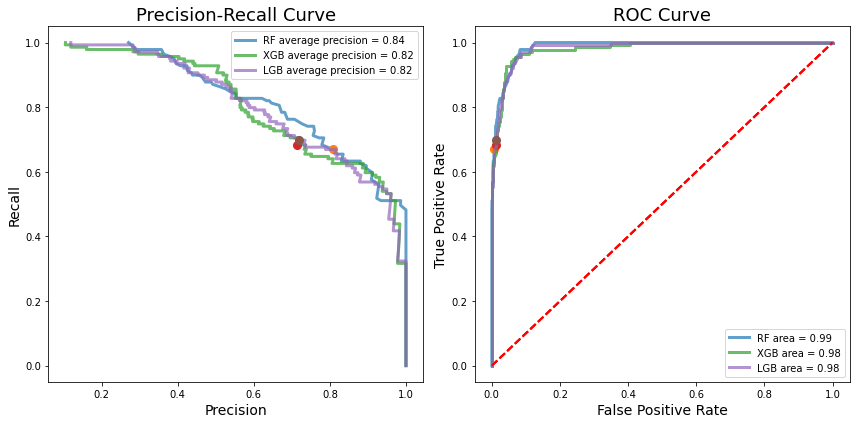

In [27]:
#Without Sampling Rebalance Result 

results("Without Sampling Rebalance")

In [28]:
# No. of fraud cases to be use for under sampling

print("Fraud Class =", len(model_data[model_data.is_fraud == 1]))

Fraud Class = 487


In [29]:
# Under Sampling

train_non_fraud = model_data[model_data.is_fraud == 0]
train_fraud = model_data[model_data.is_fraud == 1]
train_non_fraud_resample = resample(train_non_fraud, replace = False, n_samples = 487, random_state = 0)
train_resampled = pd.concat([train_non_fraud_resample, train_fraud])


X = train_resampled[feature_columns]
y = train_resampled['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Under Sampling
######################### RF #########################
Training Accuracy = 1.000
Test Accuracy = 0.928
ROC_AUC_score : 0.928042
[[131  12]
 [  9 141]]
--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       143
           1       0.92      0.94      0.93       150

    accuracy                           0.93       293
   macro avg       0.93      0.93      0.93       293
weighted avg       0.93      0.93      0.93       293

[21:23:47] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
######################### XGB #########################
Training Accuracy = 1.000
Test Accur

/Library/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


######################### LGB #########################
Training Accuracy = 1.000
Test Accuracy = 0.908
ROC_AUC_score : 0.907879
[[130  13]
 [ 14 136]]
--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       143
           1       0.91      0.91      0.91       150

    accuracy                           0.91       293
   macro avg       0.91      0.91      0.91       293
weighted avg       0.91      0.91      0.91       293



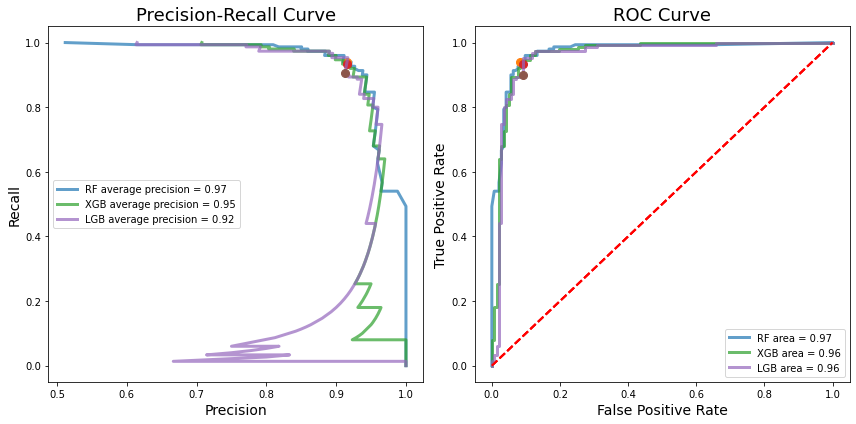

In [30]:
#Under Sampling Result 

results("Under Sampling")


In [31]:
# No. of non fraud cases to be used for over sampling

print("Non Fraud Class =", len(model_data[model_data.is_fraud == 0]))

Non Fraud Class = 9790


In [32]:
# Over Sampling

train_non_fraud = model_data[model_data.is_fraud == 0]
train_fraud = model_data[model_data.is_fraud == 1]
train_fraud_resample = resample(train_fraud, replace = True, n_samples = 9790, random_state = 0)
train_resampled = pd.concat([train_non_fraud, train_fraud_resample])


X = train_resampled[feature_columns]
y = train_resampled['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Over Sampling
######################### RF #########################
Training Accuracy = 1.000
Test Accuracy = 0.992
ROC_AUC_score : 0.992295
[[2875   45]
 [   0 2954]]
--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2920
           1       0.98      1.00      0.99      2954

    accuracy                           0.99      5874
   macro avg       0.99      0.99      0.99      5874
weighted avg       0.99      0.99      0.99      5874

[21:23:49] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


######################### XGB #########################
Training Accuracy = 1.000
Test Accuracy = 0.990
ROC_AUC_score : 0.989726
[[2860   60]
 [   0 2954]]
--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2920
           1       0.98      1.00      0.99      2954

    accuracy                           0.99      5874
   macro avg       0.99      0.99      0.99      5874
weighted avg       0.99      0.99      0.99      5874

######################### LGB #########################
Training Accuracy = 0.997
Test Accuracy = 0.986
ROC_AUC_score : 0.986130
[[2839   81]
 [   0 2954]]
--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      2920
           1       0.97      1.00      0.99      2954

    accuracy                           0.99      5874
   macro avg       0.99      0.99  

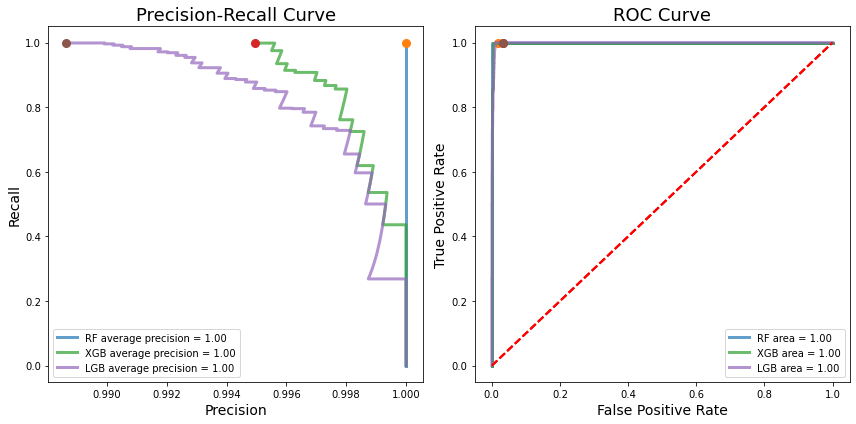

In [33]:
#Over Sampling Result

results("Over Sampling")

In [34]:
# 4. Variable Creation

identity_data = data

grouped = identity_data[['customer_id','age','annual_salary','is_fraud']].groupby(['customer_id','age','is_fraud']).count().reset_index()

duplicate_id = grouped[grouped.customer_id.duplicated() == True].customer_id


custom_1 = identity_data['customer_id'].astype(str).str.cat(identity_data['age'].astype(str),sep = " - ")
custom_2 = identity_data['customer_id'].astype(str).str.cat(identity_data['annual_salary'].astype(str),sep = " - ")

identity_data.insert(1,'custom_1',custom_1)
identity_data.insert(2,'custom_2',custom_2)

identity_data.head()


,transaction_id,custom_1,custom_2,time_of_purchase,hour,time_of_day,purchase_amount_nm,purchase_amount (SEK),customer_id,full name,...,email,domain,has_paid_before,annual_salary_nm,annual_salary,salary_range,type_of_goods,delivery_city,ip_country,is_fraud
0,2001563,3941 - 28,3941 - 135000.0,16:52:11,16,5,2.967103,15249.0,3941,Agneta Jansson,...,og20neta.jansslite@hotmail.con,2,1,-0.247451,135000.0,Not Available,2,2,5,0
1,1997663,122158 - 73,122158 - 340000.0,14:20:45,14,4,1.583612,9334.0,122158,Agneta Gustafsson,...,og20neta_gustafsslite@gmail.con,1,0,1.187854,340000.0,"(300000, 350000]",3,7,5,0
2,2013263,25977 - 60,25977 - 304000.0,12:26:00,12,4,1.445613,8744.0,25977,Agneta Olofsson,...,og20neta.olofsslite@hotmail.con,2,1,0.935801,304000.0,"(300000, 350000]",2,2,5,0
3,2009363,31238 - 66,31238 - 76000.0,15:13:01,15,4,0.986009,6779.0,31238,Agneta Petersson,...,og20neta.petersslite@hotmail.con,2,1,-0.660539,76000.0,"(50000, 100000]",4,2,5,0
4,1988563,37499 - 36,37499 - 228000.0,16:08:04,16,5,0.561255,4963.0,37499,Agneta Karlsson,...,og20n.kalite@yahoo.sn,7,0,0.403688,228000.0,"(200000, 250000]",6,6,2,0


In [35]:
#result output for identification of stolen identity cases / fake information

identity_data[identity_data['customer_id'].isin([14521,7118,16952])].sort_values(by=['custom_1'])

,transaction_id,custom_1,custom_2,time_of_purchase,hour,time_of_day,purchase_amount_nm,purchase_amount (SEK),customer_id,full name,...,email,domain,has_paid_before,annual_salary_nm,annual_salary,salary_range,type_of_goods,delivery_city,ip_country,is_fraud
4077,2011365,14521 - 63,14521 - 130000.0,18:00:03,18,5,-0.316788,1209.0,14521,Jan Lindstrom,...,oa20n.lindstrlite@hotmail.con,2,1,-0.282458,130000.0,"(100000, 150000]",6,9,5,0
10090,1995804,14521 - 71,14521 - 69000.0,19:23:20,19,5,0.354959,4081.0,14521,Marcus Svensson,...,ot20e3nlite@hotmail.con,2,0,-0.709549,69000.0,"(50000, 100000]",5,2,4,1
4677,2039354,16952 - 32,16952 - 486000.0,17:30:09,17,5,-0.506945,396.0,16952,Johan Bergman,...,oo20h_bergmlite@hotmail.con,2,1,2.210072,486000.0,"(450000, 500000]",1,5,5,0
4708,2067447,16952 - 32,16952 - 486000.0,21:28:53,21,6,-0.414323,792.0,16952,Johan Bergman,...,oo20h_bergmlite@hotmail.con,2,1,2.210072,486000.0,"(450000, 500000]",1,5,5,0
4725,2089456,16952 - 32,16952 - 486000.0,21:28:53,21,6,-0.414323,792.0,16952,Johan Bergman,...,oo20h_bergmlite@hotmail.con,2,1,2.210072,486000.0,"(450000, 500000]",1,5,5,0
4742,2111465,16952 - 32,16952 - 486000.0,21:28:53,21,6,-0.414323,792.0,16952,Johan Bergman,...,oo20h_bergmlite@hotmail.con,2,1,2.210072,486000.0,"(450000, 500000]",1,5,5,0
10251,2015837,16952 - 48,16952 - 2000.0,22:20:03,22,6,-0.298077,1289.0,16952,Tomas Lindgren,...,oo20mas.lindgrlite@telia.con,6,0,-1.178649,2000.0,"(0, 50000]",4,2,4,1
8967,2039549,7118 - 24,7118 - 254000.0,20:09:17,20,6,-0.523084,327.0,7118,Susanne Bergman,...,ou20sanne.bergmlite@yahoo.sn,7,0,0.585726,254000.0,"(250000, 300000]",2,6,3,0
9792,2005125,7118 - 54,7118 - 241000.0,21:02:34,21,6,-0.316788,1209.0,7118,Alexander Lindberg,...,ol20e_lindbelite@hotmail.con,2,0,0.494707,241000.0,"(200000, 250000]",2,5,5,1
